In [64]:
import numpy as np 
import pandas as pd 
import pandas_datareader as pdr 
import matplotlib.pyplot as plt 
from datetime import datetime

In [65]:
# replace with your own API key
key = open('C:/Users/vaibh/Desktop/algo strategies/x.txt').read()

In [66]:
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('AAPL', interval='30min', outputsize='full')
AAPL = data
AAPL.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-03-18 20:00:00,164.12,164.34,164.12,164.34,39513.0
2022-03-18 19:30:00,164.11,164.15,164.01,164.14,19062.0
2022-03-18 19:00:00,164.15,164.20,164.08,164.09,12581.0
2022-03-18 18:30:00,164.16,164.22,164.12,164.15,160696.0
2022-03-18 18:00:00,164.15,164.22,164.10,164.16,25114.0


In [67]:
date = np.arange(1, len(AAPL) +1)

In [68]:
AAPL["date"]  = date

In [69]:
 
AAPL.drop(columns=[ "5. volume"], inplace = True)

In [70]:
AAPL = AAPL[["date","1. open","2. high","3. low", "4. close"]]
AAPL.head()

,date,1. open,2. high,3. low,4. close
date,,,,,
2022-03-18 20:00:00,1,164.12,164.34,164.12,164.34
2022-03-18 19:30:00,2,164.11,164.15,164.01,164.14
2022-03-18 19:00:00,3,164.15,164.20,164.08,164.09
2022-03-18 18:30:00,4,164.16,164.22,164.12,164.15
2022-03-18 18:00:00,5,164.15,164.22,164.10,164.16


In [71]:

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 960 entries, 2022-03-18 20:00:00 to 2022-02-04 04:30:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      960 non-null    int32  
 1   1. open   960 non-null    float64
 2   2. high   960 non-null    float64
 3   3. low    960 non-null    float64
 4   4. close  960 non-null    float64
dtypes: float64(4), int32(1)
memory usage: 41.2 KB


In [72]:
#moving avrage data frame 
AAPL['7-day'] = AAPL['4. close'].rolling(7).mean()
AAPL['21-day'] = AAPL['4. close'].rolling(21).mean()
AAPL

<ipython-input-72-58688e06c1f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['7-day'] = AAPL['4. close'].rolling(7).mean()
<ipython-input-72-58688e06c1f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['21-day'] = AAPL['4. close'].rolling(21).mean()


,date,1. open,2. high,3. low,4. close,7-day,21-day
date,,,,,,,
2022-03-18 20:00:00,1,164.12,164.34,164.12,164.34,NaN,NaN
2022-03-18 19:30:00,2,164.11,164.15,164.01,164.14,NaN,NaN
2022-03-18 19:00:00,3,164.15,164.20,164.08,164.09,NaN,NaN
2022-03-18 18:30:00,4,164.16,164.22,164.12,164.15,NaN,NaN
2022-03-18 18:00:00,5,164.15,164.22,164.10,164.16,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-04 06:30:00,956,172.85,172.87,172.08,172.55,172.034286,172.287857
2022-02-04 06:00:00,957,172.79,173.05,172.48,172.51,172.150000,172.289286
2022-02-04 05:30:00,958,173.51,173.51,172.75,172.80,172.504286,172.312143


In [73]:
# In[7]:


#signal
AAPL['signal'] = np.where(AAPL['7-day'] > AAPL['21-day'], 1, 0)
AAPL['signal'] = np.where(AAPL['7-day'] < AAPL['21-day'], -1, AAPL['signal'])
AAPL.dropna(inplace=True)
AAPL

<ipython-input-73-c671c966f277>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['signal'] = np.where(AAPL['7-day'] > AAPL['21-day'], 1, 0)
<ipython-input-73-c671c966f277>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['signal'] = np.where(AAPL['7-day'] < AAPL['21-day'], -1, AAPL['signal'])
<ipython-input-73-c671c966f277>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,1. open,2. high,3. low,4. close,7-day,21-day,signal
date,,,,,,,,
2022-03-18 10:00:00,21,160.5100,161.020,159.76,160.985,161.847029,163.160295,-1
2022-03-18 09:30:00,22,159.5200,161.050,159.41,160.440,161.538457,162.974581,-1
2022-03-18 09:00:00,23,159.7200,159.870,159.04,159.530,161.102029,162.755057,-1
2022-03-18 08:30:00,24,159.5301,161.021,159.30,159.760,160.733457,162.548867,-1
2022-03-18 08:00:00,25,159.5400,159.720,159.49,159.490,160.404886,162.326962,-1
...,...,...,...,...,...,...,...,...
2022-02-04 06:30:00,956,172.8500,172.870,172.08,172.550,172.034286,172.287857,-1
2022-02-04 06:00:00,957,172.7900,173.050,172.48,172.510,172.150000,172.289286,-1
2022-02-04 05:30:00,958,173.5100,173.510,172.75,172.800,172.504286,172.312143,1


In [74]:
# In[9]:


#returns system vs holding 
AAPL['return'] = np.log(AAPL['4. close']).diff()
AAPL['system_return'] = AAPL['signal'] * AAPL['return']
AAPL['entry'] = AAPL.signal.diff()
AAPL

<ipython-input-74-4809c7273fe9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['return'] = np.log(AAPL['4. close']).diff()
<ipython-input-74-4809c7273fe9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['system_return'] = AAPL['signal'] * AAPL['return']
<ipython-input-74-4809c7273fe9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,date,1. open,2. high,3. low,4. close,7-day,21-day,signal,return,system_return,entry
date,,,,,,,,,,,
2022-03-18 10:00:00,21,160.5100,161.020,159.76,160.985,161.847029,163.160295,-1,NaN,NaN,NaN
2022-03-18 09:30:00,22,159.5200,161.050,159.41,160.440,161.538457,162.974581,-1,-0.003391,0.003391,0.0
2022-03-18 09:00:00,23,159.7200,159.870,159.04,159.530,161.102029,162.755057,-1,-0.005688,0.005688,0.0
2022-03-18 08:30:00,24,159.5301,161.021,159.30,159.760,160.733457,162.548867,-1,0.001441,-0.001441,0.0
2022-03-18 08:00:00,25,159.5400,159.720,159.49,159.490,160.404886,162.326962,-1,-0.001691,0.001691,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04 06:30:00,956,172.8500,172.870,172.08,172.550,172.034286,172.287857,-1,0.005230,-0.005230,0.0
2022-02-04 06:00:00,957,172.7900,173.050,172.48,172.510,172.150000,172.289286,-1,-0.000232,0.000232,0.0
2022-02-04 05:30:00,958,173.5100,173.510,172.75,172.800,172.504286,172.312143,1,0.001680,0.001680,2.0


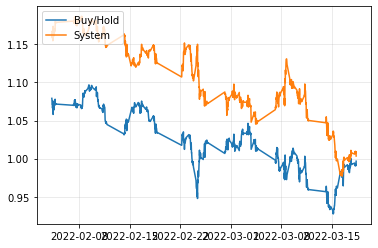

In [75]:
# In[11]:
plt.plot(np.exp(AAPL['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(AAPL['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [76]:
# In[12]:


#overall return 
(np.exp(AAPL['return']).cumprod()[-1] -1 )*100

7.910674907600379

In [77]:
# In[13]:


(np.exp(AAPL['system_return']).cumprod()[-1] -1)*100

16.683336110180512